In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('./Data-clean/Jan-Oct-2020_std_txtCleaned.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2812 non-null   int64  
 1   tweets_Date      2812 non-null   object 
 2   tweets_Text      2811 non-null   object 
 3   tweets_Replies   2812 non-null   float64
 4   tweets_Retweets  2812 non-null   float64
 5   tweets_Likes     2812 non-null   float64
 6   tweets_Images    2638 non-null   object 
 7   tweets_imageURL  1107 non-null   object 
 8   tweets_hrefURL   1100 non-null   object 
 9   has_image        2812 non-null   int64  
 10  has_Link         2812 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 241.8+ KB


In [4]:
data.head(5)

,Unnamed: 0,tweets_Date,tweets_Text,tweets_Replies,tweets_Retweets,tweets_Likes,tweets_Images,tweets_imageURL,tweets_hrefURL,has_image,has_Link
0,0,Sep 30,initial reports suggest three rockets struck b...,96.0,306.0,424.0,NaN,NaN,NaN,0,0
1,1,Sep 30,senate approved stopgap spending bill order av...,164.0,138.0,341.0,https://pbs.twimg.com/card_img/131903963670285...,https://pbs.twimg.com/card_img/131903963670285...,https://t.co/7cdxO2SXTI?amp=1,1,1
2,2,Sep 30,seven people shot funeral home milwaukee treat...,88.0,191.0,296.0,https://pbs.twimg.com/card_img/131684825020127...,https://pbs.twimg.com/card_img/131684825020127...,https://t.co/bu2k9SpEsB?amp=1,1,1
3,3,Sep 30,clare bronfman heiress seagram liquor fortune ...,64.0,237.0,651.0,https://pbs.twimg.com/card_img/131901737674292...,https://pbs.twimg.com/card_img/131901737674292...,https://t.co/gKszpRqGoB?amp=1,1,1
4,4,Sep 30,trump plans participate next two presidential ...,491.0,155.0,510.0,https://pbs.twimg.com/media/EjL5B9oWoAILvGy?fo...,NaN,NaN,1,0


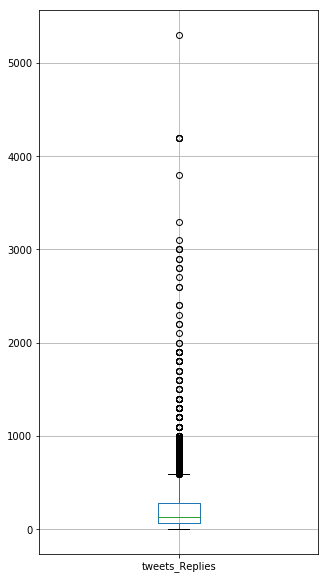

In [5]:
fig, ax = plt.subplots(figsize=(5,10))
data.boxplot('tweets_Replies')

In [6]:
data['tweets_Replies'].describe()

count    2812.000000
mean      256.099573
std       391.111999
min         1.000000
25%        70.750000
50%       134.000000
75%       278.250000
max      5300.000000
Name: tweets_Replies, dtype: float64

In [7]:
data['tweets_Likes'].describe()

count     2812.000000
mean      1668.625889
std       2563.358644
min         22.000000
25%        496.000000
50%        866.000000
75%       1800.000000
max      37200.000000
Name: tweets_Likes, dtype: float64

In [8]:
data['tweets_Retweets'].describe()

count     2812.000000
mean       639.649004
std       1059.929878
min         14.000000
25%        190.000000
50%        338.000000
75%        684.000000
max      23100.000000
Name: tweets_Retweets, dtype: float64

In [9]:
#  Categorize tweet replies into 4 groups


cat_map = { 
    range(0,70): 0,         #'very_low'
    range(70, 134): 1,      #'low'
    range(134, 278): 2,     #'moderate',
    range(278, 5301): 3     #'high'
}

data['tweets_ResponseCategory'] = data['tweets_Replies'].apply(lambda x: next((v for k, v in cat_map.items() if x in k), 0))







In [10]:
data['tweets_ResponseCategory'].value_counts()

1    713
2    706
3    705
0    688
Name: tweets_ResponseCategory, dtype: int64

In [11]:

data.drop(['tweets_imageURL', 'tweets_hrefURL', 'tweets_Images'], axis=1, inplace=True)


In [12]:
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 0 to 2811
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2811 non-null   int64  
 1   tweets_Date              2811 non-null   object 
 2   tweets_Text              2811 non-null   object 
 3   tweets_Replies           2811 non-null   float64
 4   tweets_Retweets          2811 non-null   float64
 5   tweets_Likes             2811 non-null   float64
 6   has_image                2811 non-null   int64  
 7   has_Link                 2811 non-null   int64  
 8   tweets_ResponseCategory  2811 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 219.6+ KB


In [ ]:
data.to_csv('./Data-clean/j')